In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=367037f03b349bf0fdc0eeaf3bfe57bad472a4873a57156492ca68c66ae62273
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 7.8 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173842 sha256=8bcdbeb494725c2ae826611e3890ae344050bd25ed058b26b8330e11d9e2a7d5
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218922 sha256=8014981afc845212fafd92987d158fd04e09af010c8ff9e9ee803cdea954d803
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas as pd
#import MetaTrader5 as mt5
import yfinance as yf
import ta
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import tensorflow as t
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as pt
from sklearn.preprocessing import MinMaxScaler

import math
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
import numpy as np
import pandas as pd
import pandas_ta as ta
import sklearn.preprocessing as prep

In [ ]:
#dataset etiquetada de excel csv
df_jpy= pd.read_csv('/content/drive/MyDrive/datasets stmkt/JPYUSD-5D.csv',sep=';')
df_eur= pd.read_csv('/content/drive/MyDrive/datasets stmkt/2-EURUSD-2012-1D.csv',sep=';')

df_eur_07_21= pd.read_csv('/content/drive/MyDrive/datasets stmkt/EURUSD-04-21.csv',sep=';')

In [ ]:
df_eur

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,1/01/2007,1.319801,1.321999,1.317593,1.321895,1.321895,0.0,1
1,2/01/2007,1.321895,1.329398,1.321755,1.327598,1.327598,0.0,-1
2,3/01/2007,1.327598,1.329098,1.315547,1.317107,1.317107,0.0,1
3,4/01/2007,1.317107,1.318096,1.308096,1.309295,1.309295,0.0,1
4,5/01/2007,1.309003,1.310393,1.298398,1.298499,1.298499,0.0,1
...,...,...,...,...,...,...,...,...
1561,25/12/2012,1.318392,1.320306,1.317402,1.318044,1.318044,0.0,1
1562,26/12/2012,1.318218,1.325205,1.317523,1.318044,1.318044,0.0,0
1563,27/12/2012,1.322751,1.328551,1.321493,1.322576,1.322576,0.0,-1
1564,28/12/2012,1.324854,1.325732,1.316638,1.325030,1.325030,0.0,-1


In [ ]:
df_eur_07_21

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,1/01/2004,1.259002,1.260796,1.247396,1.258194,1.258194,0.0,1
1,2/01/2004,1.258194,1.262802,1.252693,1.258194,1.258194,0.0,0
2,5/01/2004,1.263903,1.269406,1.263695,1.268698,1.268698,0.0,-1
3,6/01/2004,1.268907,1.280803,1.267202,1.272103,1.272103,0.0,-1
4,7/01/2004,1.272394,1.273999,1.262499,1.264095,1.264095,0.0,1
...,...,...,...,...,...,...,...,...
4692,27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,1
4693,28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-1
4694,29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,1
4695,30/12/2021,1.135976,1.135976,1.130071,1.136015,1.136015,0.0,-1


In [ ]:
df_jpy

,Date,Open,High,Low,Close,Adj Close,Volume,Columna1,Etiqueta
0,5/01/2001,116.070000,116.870003,115.940002,116.449997,116.449997,0.0,1.879997,-1
1,8/01/2001,116.510002,116.559998,115.620003,116.099998,116.099998,0.0,1.699996,-1
2,9/01/2001,116.019997,117.070000,115.610001,117.070000,117.070000,0.0,3.230004,-1
3,10/01/2001,117.089996,117.150002,115.739998,116.449997,116.449997,0.0,0.360001,-1
4,11/01/2001,116.489998,118.019997,116.389999,117.910004,117.910004,0.0,1.460007,-1
...,...,...,...,...,...,...,...,...,...
4426,25/12/2017,113.294998,113.345001,113.210999,113.307999,113.307999,0.0,0.739998,-1
4427,26/12/2017,113.308998,113.344002,113.189003,113.303001,113.303001,0.0,0.319999,-1
4428,27/12/2017,113.200996,113.350998,113.154999,113.203003,113.203003,0.0,-0.037994,1
4429,28/12/2017,113.222000,113.264000,112.667000,113.217003,113.217003,0.0,-0.105995,1


PROCESAMIENETO DE DATA

In [ ]:
#procesamiento del dataset JPY/USD periodo de tiempo de un 1 dia, etiqueta de los 5 dias, -1 venta, 0 mantener , 1 compra
df_jpy_csv=df_jpy.set_index('Date')
df_eur_csv=df_eur.set_index('Date')


In [ ]:
df_eur_07_21_=df_eur_07_21.set_index('Date')

In [ ]:
df_jpy_csv.fillna(method='ffill')

,Open,High,Low,Close,Adj Close,Volume,Columna1,Etiqueta
Date,,,,,,,,
5/01/2001,116.070000,116.870003,115.940002,116.449997,116.449997,0.0,1.879997,-1
8/01/2001,116.510002,116.559998,115.620003,116.099998,116.099998,0.0,1.699996,-1
9/01/2001,116.019997,117.070000,115.610001,117.070000,117.070000,0.0,3.230004,-1
10/01/2001,117.089996,117.150002,115.739998,116.449997,116.449997,0.0,0.360001,-1
11/01/2001,116.489998,118.019997,116.389999,117.910004,117.910004,0.0,1.460007,-1
...,...,...,...,...,...,...,...,...
25/12/2017,113.294998,113.345001,113.210999,113.307999,113.307999,0.0,0.739998,-1
26/12/2017,113.308998,113.344002,113.189003,113.303001,113.303001,0.0,0.319999,-1
27/12/2017,113.200996,113.350998,113.154999,113.203003,113.203003,0.0,-0.037994,1


In [ ]:
df_eur_07_21_.fillna(method='ffill')

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
1/01/2004,1.259002,1.260796,1.247396,1.258194,1.258194,0.0,1
2/01/2004,1.258194,1.262802,1.252693,1.258194,1.258194,0.0,0
5/01/2004,1.263903,1.269406,1.263695,1.268698,1.268698,0.0,-1
6/01/2004,1.268907,1.280803,1.267202,1.272103,1.272103,0.0,-1
7/01/2004,1.272394,1.273999,1.262499,1.264095,1.264095,0.0,1
...,...,...,...,...,...,...,...
27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,1
28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-1
29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,1


In [ ]:
df_eur_csv.fillna(method='ffill')

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
1/01/2007,1.319801,1.321999,1.317593,1.321895,1.321895,0.0,1
2/01/2007,1.321895,1.329398,1.321755,1.327598,1.327598,0.0,-1
3/01/2007,1.327598,1.329098,1.315547,1.317107,1.317107,0.0,1
4/01/2007,1.317107,1.318096,1.308096,1.309295,1.309295,0.0,1
5/01/2007,1.309003,1.310393,1.298398,1.298499,1.298499,0.0,1
...,...,...,...,...,...,...,...
25/12/2012,1.318392,1.320306,1.317402,1.318044,1.318044,0.0,1
26/12/2012,1.318218,1.325205,1.317523,1.318044,1.318044,0.0,0
27/12/2012,1.322751,1.328551,1.321493,1.322576,1.322576,0.0,-1


In [ ]:
Y_train_eur=df_eur_csv['Label']
df_eur_csv.drop(['Label'],axis=1, inplace=True)
#ejecutar solo una vez

In [ ]:
Y_train_eur_07_21=df_eur_07_21_['Label']
df_eur_07_21_.drop(['Label'],axis=1, inplace=True)
#ejecutar solo una vez

In [ ]:
Y_train_jpy_5d=df_jpy_csv['Etiqueta']
df_jpy_csv.drop(['Columna1','Etiqueta'],axis=1, inplace=True)
#ejecutar solo una vez


In [ ]:
print(len(Y_train_jpy_5d))

4431


In [ ]:
Y_train_jpy_5d

Date
5/01/2001    -1
8/01/2001    -1
9/01/2001    -1
10/01/2001   -1
11/01/2001   -1
             ..
25/12/2017   -1
26/12/2017   -1
27/12/2017    1
28/12/2017    1
29/12/2017    1
Name: Etiqueta, Length: 4431, dtype: int64

In [ ]:
print(df_jpy_csv)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
5/01/2001   116.070000  116.870003  115.940002  116.449997  116.449997     0.0
8/01/2001   116.510002  116.559998  115.620003  116.099998  116.099998     0.0
9/01/2001   116.019997  117.070000  115.610001  117.070000  117.070000     0.0
10/01/2001  117.089996  117.150002  115.739998  116.449997  116.449997     0.0
11/01/2001  116.489998  118.019997  116.389999  117.910004  117.910004     0.0
...                ...         ...         ...         ...         ...     ...
25/12/2017  113.294998  113.345001  113.210999  113.307999  113.307999     0.0
26/12/2017  113.308998  113.344002  113.189003  113.303001  113.303001     0.0
27/12/2017  113.200996  113.350998  113.154999  113.203003  113.203003     0.0
28/12/2017  113.222000  113.264000  112.667000  113.217003  113.217003     0.0
29/12/2017  112.875999  112.966003  112.468002  112.

In [ ]:
df_eur_csv.ta.log_return(cumulative=True, append=True)
df_eur_csv.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df_eur_csv.columns

# Take a peek
df_eur_csv.tail()
df_eur_csv

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
1/01/2007,1.319801,1.321999,1.317593,1.321895,1.321895,0.0,0.000000,0.000000
2/01/2007,1.321895,1.329398,1.321755,1.327598,1.327598,0.0,0.004305,0.004314
3/01/2007,1.327598,1.329098,1.315547,1.317107,1.317107,0.0,-0.003629,-0.003622
4/01/2007,1.317107,1.318096,1.308096,1.309295,1.309295,0.0,-0.009577,-0.009532
5/01/2007,1.309003,1.310393,1.298398,1.298499,1.298499,0.0,-0.017857,-0.017699
...,...,...,...,...,...,...,...,...
25/12/2012,1.318392,1.320306,1.317402,1.318044,1.318044,0.0,-0.002917,-0.002913
26/12/2012,1.318218,1.325205,1.317523,1.318044,1.318044,0.0,-0.002917,-0.002913
27/12/2012,1.322751,1.328551,1.321493,1.322576,1.322576,0.0,0.000515,0.000515


In [ ]:
df_eur_07_21_.ta.log_return(cumulative=True, append=True)
df_eur_07_21_.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df_eur_07_21_.columns

# Take a peek
df_eur_07_21_.tail()


,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,-0.105315,-0.099959
28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-0.104806,-0.099501
29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,-0.106153,-0.100713
30/12/2021,1.135976,1.135976,1.130071,1.136015,1.136015,0.0,-0.102151,-0.097107
31/12/2021,1.132323,1.137915,1.130506,1.132503,1.132503,0.0,-0.105247,-0.099898


In [ ]:
df_jpy_csv.ta.log_return(cumulative=True, append=True)
df_jpy_csv.ta.percent_return(cumulative=True, append=True)

# New Columns with results
df_jpy_csv.columns

# Take a peek
df_jpy_csv.tail()
df_jpy_csv

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
5/01/2001,116.070000,116.870003,115.940002,116.449997,116.449997,0.0,0.000000,0.000000
8/01/2001,116.510002,116.559998,115.620003,116.099998,116.099998,0.0,-0.003010,-0.003006
9/01/2001,116.019997,117.070000,115.610001,117.070000,117.070000,0.0,0.005310,0.005324
10/01/2001,117.089996,117.150002,115.739998,116.449997,116.449997,0.0,0.000000,0.000000
11/01/2001,116.489998,118.019997,116.389999,117.910004,117.910004,0.0,0.012460,0.012538
...,...,...,...,...,...,...,...,...
25/12/2017,113.294998,113.345001,113.210999,113.307999,113.307999,0.0,-0.027352,-0.026982
26/12/2017,113.308998,113.344002,113.189003,113.303001,113.303001,0.0,-0.027396,-0.027024
27/12/2017,113.200996,113.350998,113.154999,113.203003,113.203003,0.0,-0.028279,-0.027883


In [ ]:
# Create your own Custom Strategy
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
    ]
)
# To run your "Custom Strategy"


In [ ]:
df_eur_csv.ta.strategy(CustomStrategy)
df_eur_csv

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
Date,,,,,,,,,,,,,,,
1/01/2007,1.319801,1.321999,1.317593,1.321895,1.321895,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/01/2007,1.321895,1.329398,1.321755,1.327598,1.327598,0.0,0.004305,0.004314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/01/2007,1.327598,1.329098,1.315547,1.317107,1.317107,0.0,-0.003629,-0.003622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/01/2007,1.317107,1.318096,1.308096,1.309295,1.309295,0.0,-0.009577,-0.009532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/01/2007,1.309003,1.310393,1.298398,1.298499,1.298499,0.0,-0.017857,-0.017699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25/12/2012,1.318392,1.320306,1.317402,1.318044,1.318044,0.0,-0.002917,-0.002913,1.315358,NaN,NaN,60.404266,0.009050,0.000764,0.008286
26/12/2012,1.318218,1.325205,1.317523,1.318044,1.318044,0.0,-0.002917,-0.002913,1.317030,NaN,NaN,60.404266,0.008418,0.000106,0.008313
27/12/2012,1.322751,1.328551,1.321493,1.322576,1.322576,0.0,0.000515,0.000515,1.318620,NaN,NaN,64.144325,0.008397,0.000067,0.008329


In [ ]:
df_eur_07_21_.ta.strategy(CustomStrategy)
df_eur_07_21_

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
Date,,,,,,,,,,,,,,,
1/01/2004,1.259002,1.260796,1.247396,1.258194,1.258194,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/01/2004,1.258194,1.262802,1.252693,1.258194,1.258194,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/01/2004,1.263903,1.269406,1.263695,1.268698,1.268698,0.0,0.008314,0.008348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/01/2004,1.268907,1.280803,1.267202,1.272103,1.272103,0.0,0.010994,0.011055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/01/2004,1.272394,1.273999,1.262499,1.264095,1.264095,0.0,0.004679,0.004690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,-0.105315,-0.099959,1.129607,1.141152,1.176881,49.357620,-0.000736,0.001500,-0.002236
28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-0.104806,-0.099501,1.130053,1.140584,1.176580,50.098652,-0.000374,0.001490,-0.001864
29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,-0.106153,-0.100713,1.130588,1.139950,1.176317,48.095534,-0.000310,0.001243,-0.001553


In [ ]:
df_jpy_csv.ta.strategy(CustomStrategy)

In [ ]:
df_eur_csv.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

KeyError: ignored

In [ ]:
df_eur_07_21_.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

In [ ]:
df_jpy_csv.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

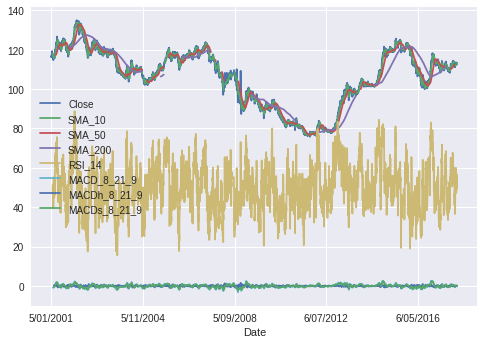

In [ ]:
df_jpy_csv.plot()

In [ ]:
df_eur_csv=df_eur_csv.fillna(0)

In [ ]:
df_eur_07_21_=df_eur_07_21_.fillna(0)

In [ ]:
df_jpy_csv=df_jpy_csv.fillna(0)

In [ ]:
df_jpy_csv

,Close,SMA_10,SMA_50,SMA_200,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
Date,,,,,,,,
5/01/2001,116.449997,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8/01/2001,116.099998,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9/01/2001,117.070000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10/01/2001,116.449997,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
11/01/2001,117.910004,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
25/12/2017,113.307999,113.040200,0.0,0.0,56.348948,0.184733,0.079839,0.104893
26/12/2017,113.303001,113.016500,0.0,0.0,56.278498,0.198401,0.074806,0.123595
27/12/2017,113.203003,112.982301,0.0,0.0,54.802203,0.190927,0.053865,0.137061


In [ ]:
sc=StandardScaler()

X_eur_sc=sc.fit_transform(df_eur_csv)
print(X_eur_sc)

[[-0.16254573 -3.63429069 -1.89262068 ...  0.0165245  -0.00650333
   0.01919831]
 [-0.13191131 -3.63429069 -1.89262068 ...  0.0165245  -0.00650333
   0.01919831]
 [-0.1882651  -3.63429069 -1.89262068 ...  0.0165245  -0.00650333
   0.01919831]
 ...
 [-0.15888764  0.12222995 -1.89262068 ...  0.67473967  0.00903325
   0.72540369]
 [-0.14570566  0.12711768 -1.89262068 ...  0.6855035   0.03130445
   0.72887239]
 [-0.15785092  0.12887911 -1.89262068 ...  0.65632554 -0.04505172
   0.72533574]]


In [ ]:
sc=StandardScaler()

X_eur_sc_07_21=sc.fit_transform(df_eur_07_21_)
print(X_eur_sc_07_21)

[[ 6.70355235e-02 -4.69726908e+00 -2.39176119e+00 ...  2.84306824e-02
  -1.59542256e-03  3.02593578e-02]
 [ 6.70355235e-02 -4.69726908e+00 -2.39176119e+00 ...  2.84306824e-02
  -1.59542256e-03  3.02593578e-02]
 [ 1.35100266e-01 -4.69726908e+00 -2.39176119e+00 ...  2.84306824e-02
  -1.59542256e-03  3.02593578e-02]
 ...
 [-7.54069954e-01 -3.03345391e-01  1.62899105e-01 ... -5.52491659e-03
   3.88141798e-01 -1.54421352e-01]
 [-7.24670703e-01 -3.00648615e-01  1.61577526e-01 ...  6.52978061e-02
   4.72515295e-01 -1.09474732e-01]
 [-7.47428069e-01 -3.01002666e-01  1.60231519e-01 ...  6.41528813e-02
   3.75069060e-01 -7.37662043e-02]]


In [ ]:
sc=StandardScaler()

X_jpy_5d=sc.fit_transform(df_jpy_csv)
print(X_jpy_5d)
print(len(X_jpy_5d))

[[ 6.63965111e-01 -4.25116091e+00 -2.36118086e+00 ...  4.45066735e-03
  -2.59422765e-03  4.31531097e-03]
 [ 6.42805216e-01 -4.25116091e+00 -2.36118086e+00 ...  4.45066735e-03
  -2.59422765e-03  4.31531097e-03]
 [ 7.01448643e-01 -4.25116091e+00 -2.36118086e+00 ...  4.45066735e-03
  -2.59422765e-03  4.31531097e-03]
 ...
 [ 4.67661538e-01  4.39454069e-01 -2.36118086e+00 ...  2.47716464e-01
   1.88281416e-01  1.95127186e-01]
 [ 4.68507937e-01  4.41260051e-01 -2.36118086e+00 ...  2.38410512e-01
   1.29401149e-01  2.08091428e-01]
 [ 4.47831455e-01  4.43248669e-01 -2.36118086e+00 ...  1.69883418e-01
  -4.94662519e-02  2.03487780e-01]]
4431


In [ ]:

#PCA

pca=PCA(n_components=6)
X_eur_pca=pca.fit_transform(X_eur_sc)
print(X_eur_pca)


[[ 3.00871381  2.91989388  0.23739949 -0.75802292  2.31207829  2.3897306 ]
 [ 3.00134022  2.91508896  0.21417241 -0.75882034  2.32894198  2.39330227]
 [ 3.01490437  2.92392788  0.25689998 -0.75735344  2.29792024  2.38673198]
 ...
 [-1.03111252  2.13093659 -0.54812848 -0.15416924 -0.63041205 -0.85587065]
 [-1.12309843  2.15270945 -0.53831202 -0.11863911 -0.63666495 -0.92487835]
 [-0.95322209  2.1059983  -0.57361258 -0.21183946 -0.63243104 -0.81382042]]


In [ ]:

pca=PCA(n_components=6)
X_eur_pca_07_21=pca.fit_transform(X_eur_sc_07_21)


In [ ]:
print(X_eur_pca_07_21)

[[ 8.00232924  0.72215082  2.2332811  -0.03547883 -0.67219955  0.67748299]
 [ 8.00232924  0.72215082  2.2332811  -0.03547883 -0.67219955  0.67748299]
 [ 7.95560739  0.77355111  2.34973919 -0.02350254 -0.70346874  0.68510283]
 ...
 [ 0.75841266 -0.4429515  -1.69349696 -0.09558779 -0.8117478  -0.74134161]
 [ 0.39689345  0.17440695 -2.12736164  0.25537302 -0.83547994 -0.77553212]
 [ 0.68125336 -0.29456973 -1.77134736 -0.1072709  -0.77919545 -0.69553529]]


In [ ]:
pca=PCA(n_components=6)
X_jpy_5d_pca=pca.fit_transform(X_jpy_5d)

In [ ]:
print(len(X_jpy_5d_pca))

4431


In [ ]:
spl=int(len(X_eur_pca_07_21)*0.90)

X_eur_train_07_21_=X_eur_pca_07_21[:spl]

X_eur_test_07_21=X_eur_pca_07_21[spl:]


Y_eur_07_21_=np.array(Y_train_eur_07_21)

y_train_07_21=Y_eur_07_21_[:spl]

y_test_07_21=Y_eur_07_21_[spl:]


In [ ]:
spl=int(len(X_eur_pca)*0.85)

x_train_eur=X_eur_pca[:spl]

x_test_eur=X_eur_pca[spl:]


Y_train_eur_=np.array(Y_train_eur)

y_train_eur=Y_train_eur_[:spl]

y_test_eur=Y_train_eur_[spl:]


In [ ]:
spl=int(len(X_jpy_5d_pca)*0.85)

x_train_jpy_5d=X_jpy_5d_pca[:spl]

x_test_jpy_5d=X_jpy_5d_pca[spl:]


Y_train_jpy=np.array(Y_train_jpy_5d)

y_train_jpy_5d=Y_train_jpy[:spl]

y_test_jpy_5d=Y_train_jpy[spl:]


In [ ]:
print(len(x_train_jpy_5d))
print(len(y_train_jpy_5d))

3766
3766


In [ ]:
print(len(x_test_jpy_5d))
print(len(y_test_jpy_5d))

665
665


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def metrics_classf_model(y_test,y_pred):
  precision_sc=precision_score(y_test, y_pred,average='micro')
  acc_sc=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred,average='micro')
  return (precision_sc*100,acc_sc*100,f1*100)


In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Parameter Optimization SVM Bayesian Optimisation from Hyperopt

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df_SVMC= pd.read_csv('/content/drive/MyDrive/datasets stmkt/EURO-2CLS.csv',sep=';')

In [ ]:
df_SVMC=df_SVMC.set_index('Date')


In [ ]:
df_SVMC

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
1/01/2004,1.259002,1.260796,1.247396,1.258194,1.258194,0.0,1
2/01/2004,1.258194,1.262802,1.252693,1.258194,1.258194,0.0,1
5/01/2004,1.263903,1.269406,1.263695,1.268698,1.268698,0.0,-1
6/01/2004,1.268907,1.280803,1.267202,1.272103,1.272103,0.0,-1
7/01/2004,1.272394,1.273999,1.262499,1.264095,1.264095,0.0,1
...,...,...,...,...,...,...,...
27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,1
28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-1
29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,1


In [ ]:
Y_train_SVM=df_SVMC['Label']
df_SVMC.drop(['Label'],axis=1, inplace=True)
#ejecutar solo una vez


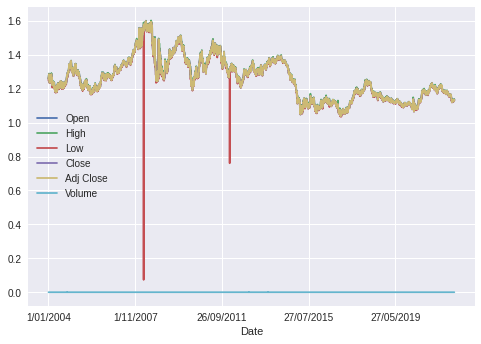

In [ ]:
df_SVMC.plot()

In [ ]:
df_SVMC.ta.log_return(cumulative=True, append=True)
df_SVMC.ta.percent_return(cumulative=True, append=True)

Date
1/01/2004     0.000000
2/01/2004     0.000000
5/01/2004     0.008348
6/01/2004     0.011055
7/01/2004     0.004690
                ...   
27/12/2021   -0.099959
28/12/2021   -0.099501
29/12/2021   -0.100713
30/12/2021   -0.097107
31/12/2021   -0.099898
Name: CUMPCTRET_1, Length: 4680, dtype: float64

In [ ]:
df_SVMC.tail()

,Open,High,Low,Close,Adj Close,Volume,CUMLOGRET_1,CUMPCTRET_1
Date,,,,,,,,
27/12/2021,1.132387,1.133500,1.130416,1.132426,1.132426,0.0,-0.105315,-0.099959
28/12/2021,1.132978,1.133600,1.129038,1.133003,1.133003,0.0,-0.104806,-0.099501
29/12/2021,1.131337,1.137001,1.127536,1.131478,1.131478,0.0,-0.106153,-0.100713
30/12/2021,1.135976,1.135976,1.130071,1.136015,1.136015,0.0,-0.102151,-0.097107
31/12/2021,1.132323,1.137915,1.130506,1.132503,1.132503,0.0,-0.105247,-0.099898


In [ ]:
df_SVMC.ta.strategy(CustomStrategy)

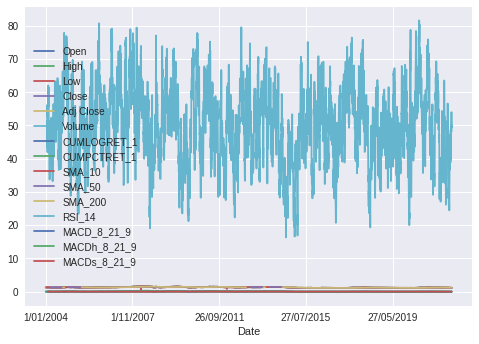

In [ ]:
df_SVMC.plot()

In [ ]:
df_SVMC.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)

In [ ]:
df_SVMC=df_SVMC.fillna(0)

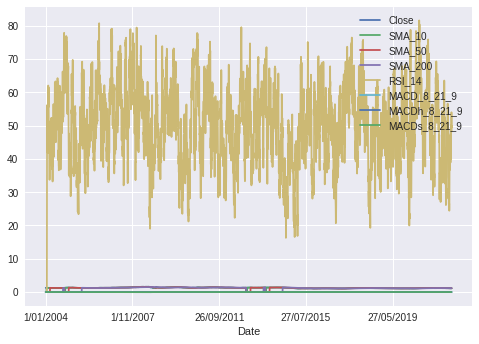

In [ ]:
df_SVMC.plot()

In [ ]:
spl=int(len(df_SVMC)*0.8)

X_train_SVMC=df_SVMC.iloc[:spl]

X_test_SVMC=df_SVMC[spl:]
print(len(X_train_SVMC))

Y_train_SVM=np.array(Y_train_SVM)

Y_train_SVM_=Y_train_SVM[:spl]

y_test_SVM=Y_train_SVM[spl:]

3744


In [ ]:
sc=StandardScaler()

X_train_SVMC=sc.fit_transform(X_train_SVMC)
X_test_SVMC=sc.transform(X_test_SVMC)



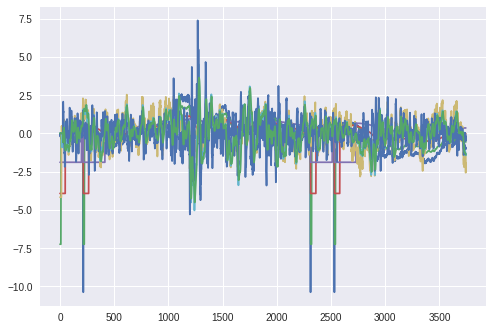

In [ ]:
plt.plot(X_train_SVMC[:,0:20])
plt.show()

In [ ]:
pca=PCA(n_components=3)
X_SVMC_pca_train=pca.fit_transform(X_train_SVMC)
X__SVMC_pca_test=pca.transform(X_test_SVMC)
print(X_SVMC_pca_train)

[[ 2.56920729  6.95426647 -1.05862795]
 [ 2.56920729  6.95426647 -1.05862795]
 [ 2.55452079  6.91256765 -1.08812892]
 ...
 [ 2.92712337  0.45381753  0.52606701]
 [ 3.26957918  0.4599435   0.35794773]
 [ 2.44026829  0.47614717  0.71877735]]


In [ ]:
best_score=1.0
metric = 'accuracy'

def objective(space):

    global best_score
    model = SVC(**space)
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model,X_train_SVMC,Y_train_SVM_, cv=kfold, scoring=metric, verbose=False).mean()
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.

    if (score < best_score):
        best_score=score
    return score

In [ ]:
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

space = {
      'C': hp.choice('C', np.arange(0.005,1.0,0.01)),
      'kernel': hp.choice('kernel',['linear', 'poly', 'rbf','sigmoid']),
      'degree':hp.choice('degree',[1,2,3,4,5]),
      'probability':hp.choice('probability',[True])
      }

In [ ]:
import time

In [ ]:
n_iter_hopt = 100
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions
seed = 30
kFoldSplits = 5
start = time.time()

best = fmin(objective,
            space = space,
            algo = tpe.suggest,
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.RandomState(seed))

elapsed_time_hopt = time.time() - start

100%|██████████| 100/100 [18:06<00:00, 10.87s/it, best loss: 0.2844519966015293]


In [ ]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 1086.77 seconds for 100 candidates. Accuracy reached: 71.555
Optimal parameters found: {'C': 92, 'degree': 3, 'kernel': 2, 'probability': 0}


In [ ]:
#modelo SVc prueba kernel lineal
svc=SVC(kernel='rbf',C=92,degree=3,probability=0)
svc.fit(X_train_SVMC,Y_train_SVM_)
#y prediction from svr
y_pred=svc.predict(X_test_SVMC)
print(y_pred)

[-1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1
 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1
  1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1

In [ ]:
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_SVM,y_pred)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  74.03846153846155 Precision % =  74.03846153846155 F1 Score % =  74.03846153846155


In [ ]:
print(classification_report(y_test_SVM,y_pred))


              precision    recall  f1-score   support

          -1       0.76      0.70      0.73       473
           1       0.72      0.78      0.75       463

    accuracy                           0.74       936
   macro avg       0.74      0.74      0.74       936
weighted avg       0.74      0.74      0.74       936



In [ ]:
#modelo SVc prueba kernel lineal
svc=SVC(kernel='linear',class_weight='balanced')
svc.fit(x_train_eur,np.array(y_train_eur).ravel())
#y prediction from svr
X_eur_tot=np.concatenate((x_train_eur,x_test_eur),axis=0)

y_pred_eur=svc.predict(x_test_eur)

In [ ]:
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_eur,y_pred_eur)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  55.319148936170215 Precision % =  55.319148936170215 F1 Score % =  55.319148936170215


In [ ]:
#modelo SVc prueba kernel lineal
svc=SVC(kernel='linear',C=128)
svc.fit(x_train_eur,np.array(y_train_eur).ravel())
#y prediction from svr
X_eur_tot=np.concatenate((x_train_eur,x_test_eur),axis=0)

y_pred_eur=svc.predict(x_test_eur)

In [ ]:
#data del 2004 al 2021
svc_lin_2=SVC(kernel='linear',verbose=True)
svc_lin_2.fit(X_eur_train_07_21_,y_train_07_21)
#y prediction from svc

y_pred_eur_07_21=svc_lin_2.predict(X_eur_test_07_21)

[LibSVM]

In [ ]:
percentage = svc_lin_2.score(X_eur_test_07_21,y_test_07_21)
print(f"Accuracy = {percentage*100} %")

Accuracy = 59.57446808510638 %


In [ ]:
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_07_21,y_pred_eur_07_21)
print("Modelo SVC Data 2007-2021 Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Modelo SVC Data 2007-2021 Accuracy % =  59.57446808510638 Precision % =  59.57446808510638 F1 Score % =  59.57446808510638


In [ ]:
#metricas del modelo SVC KERNEL LINEAR
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_eur,y_pred_eur)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  54.46808510638298 Precision % =  54.46808510638298 F1 Score % =  54.46808510638298


In [ ]:
#modelo SVC KERNEL SIGMOID
svC_2=SVC(kernel='sigmoid')
svC_2.fit(x_train_eur,y_train_eur)


SVC(kernel='sigmoid')

In [ ]:
#metricas del modelo SVC sigmoid
y_pred_eur_sigmoid=svC_2.predict(x_test_eur)
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_eur,y_pred_eur_sigmoid)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  51.48936170212765 Precision % =  51.48936170212765 F1 Score % =  51.48936170212765


In [ ]:
# kernel poly SVC
svC_3=SVC(kernel='poly')
svC_3.fit(x_train_eur,y_train_eur)

SVC(kernel='poly')

In [ ]:
svC_3_07_21=SVC(kernel='poly') #data 2007-2021
svC_3_07_21.fit(X_eur_train_07_21_,y_train_07_21)

SVC(kernel='poly')

In [ ]:
#metricas del modelo SVC KERNEL poly 07-21
y_pred_eur_poly_07=svC_3_07_21.predict(X_eur_test_07_21)
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_07_21,y_pred_eur_poly_07)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  61.06382978723405 Precision % =  61.06382978723405 F1 Score % =  61.06382978723405


In [ ]:
#metricas del modelo SVC KERNEL poly
y_pred_eur_poly=svC_2.predict(x_test_eur)
pc_eur,acc_eur,f1_eur=metrics_classf_model(y_test_eur,y_pred_eur_poly)
print("Accuracy % = ",acc_eur,"Precision % = ",pc_eur,"F1 Score % = ",f1_eur)

Accuracy % =  51.48936170212765 Precision % =  51.48936170212765 F1 Score % =  51.48936170212765


In [ ]:
#reporte SVC lineal dataset de 1 año
print(classification_report(y_test_eur,y_pred_eur))

              precision    recall  f1-score   support

          -1       0.52      0.61      0.56       109
           0       0.00      0.00      0.00         6
           1       0.57      0.52      0.54       120

    accuracy                           0.54       235
   macro avg       0.36      0.37      0.37       235
weighted avg       0.53      0.54      0.54       235



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#reporte SVC lineal dataset de 07-21
print(classification_report(y_test_07_21,y_pred_eur_07_21))

              precision    recall  f1-score   support

          -1       0.62      0.55      0.58       237
           0       0.00      0.00      0.00         3
           1       0.58      0.65      0.61       230

    accuracy                           0.60       470
   macro avg       0.40      0.40      0.40       470
weighted avg       0.59      0.60      0.59       470



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#reporte SVC sigmoid 1 año
print(classification_report(y_test_eur,y_pred_eur_sigmoid))

              precision    recall  f1-score   support

          -1       0.51      0.39      0.44       109
           0       0.00      0.00      0.00         6
           1       0.53      0.65      0.58       120

    accuracy                           0.51       235
   macro avg       0.34      0.35      0.34       235
weighted avg       0.50      0.51      0.50       235



In [ ]:
#reporte SVC polinomisl 1 año
print(classification_report(y_test_eur,y_pred_eur_poly))

              precision    recall  f1-score   support

          -1       0.51      0.39      0.44       109
           0       0.00      0.00      0.00         6
           1       0.53      0.65      0.58       120

    accuracy                           0.51       235
   macro avg       0.34      0.35      0.34       235
weighted avg       0.50      0.51      0.50       235



In [ ]:
#reporte SVC polinomisl 1 año
print(classification_report(y_test_07_21,y_pred_eur_poly_07))
report=classification_report(y_test_07_21,y_pred_eur_poly_07)
print(type(report))

              precision    recall  f1-score   support

          -1       0.59      0.75      0.66       237
           0       0.00      0.00      0.00         3
           1       0.64      0.47      0.55       230

    accuracy                           0.61       470
   macro avg       0.41      0.41      0.40       470
weighted avg       0.61      0.61      0.60       470

<class 'str'>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
#MULTILAYER PERCEPTRON ANN modelo
# Parameters

learning_rate = 0.001
training_epochs = 200
batch_size = 128
display_step = 1
#seed 1234L

# Network Parameters
n_hidden_1 = 6 # 1st layer number of neurons
n_hidden_2 = 6 # 2nd layer number of neurons
n_input = 4697 # MNIST data input (img shape: 28*28)
n_classes = 3 # -1 venta, 0 mant , 1 compra


In [ ]:
model_MLP = Sequential()

input_layer = Dense(200,input_shape=(6,))
model_MLP.add(input_layer)
hidden_layer = Dense(300, activation='relu')
model_MLP.add(hidden_layer)
hidden_layer_2 = Dense(300, activation='relu')
model_MLP.add(hidden_layer_2)
hidden_layer_3 = Dense(200, activation='relu')
model_MLP.add(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')
model_MLP.add(output_layer)

In [ ]:
model = Sequential()
# Capas de Neuronas.

# Capa densa con 50 neuronas y 8 variables de entrada.
model.add(Dense(50, input_dim = 6, kernel_initializer='uniform', activation='relu'))

# Capa para evitar que los pesos crezcan y exista sobreentrenamiento.
model.add(Dropout(0.5))

# Capa densa con 500 neuronas y 500 variables de entrada.
model.add(Dense(500, input_dim = 500, kernel_initializer='uniform', activation='relu'))

# Capa para evitar que los pesos crezcan y exista sobreentrenamiento.
model.add(Dropout(0.5))

# Capa densa con 2 neuronas.
model.add(Dense(3, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics=['accuracy']
)
#2

In [ ]:
history = model.fit(
    x_train_jpy_5d, y_train_jpy_5d, epochs=150,
    batch_size=100,
)
#2

Epoch 1/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7734 - accuracy: 0.1638
Epoch 2/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7725 - accuracy: 0.1694
Epoch 3/150
38/38 [==============================] - 0s 5ms/step - loss: 0.7706 - accuracy: 0.1938
Epoch 4/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7716 - accuracy: 0.1644
Epoch 5/150
38/38 [==============================] - 0s 5ms/step - loss: 0.7713 - accuracy: 0.1689
Epoch 6/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7731 - accuracy: 0.1715
Epoch 7/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.1646
Epoch 8/150
38/38 [==============================] - 0s 7ms/step - loss: 0.7689 - accuracy: 0.1596
Epoch 9/150
38/38 [==============================] - 0s 8ms/step - loss: 0.7727 - accuracy: 0.1577
Epoch 10/150
38/38 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.1588
Epoch 11/

In [ ]:
scores = model.evaluate(x_train_jpy_5d, y_train_jpy_5d)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

118/118 [==============================] - 0s 1ms/step - loss: 0.7540 - accuracy: 0.1617
accuracy: 16.17%


In [ ]:
model_MLP.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics=['accuracy']
)


In [ ]:
history = model_MLP.fit(
    x_train_jpy_5d, y_train_jpy_5d, epochs=250,
    batch_size=150,
)

Epoch 1/250
26/26 [==============================] - 2s 13ms/step - loss: 0.8758 - accuracy: 0.1676
Epoch 2/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8110 - accuracy: 0.2642
Epoch 3/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8065 - accuracy: 0.2573
Epoch 4/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7950 - accuracy: 0.2706
Epoch 5/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7932 - accuracy: 0.2698
Epoch 6/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7933 - accuracy: 0.2570
Epoch 7/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7871 - accuracy: 0.2671
Epoch 8/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7822 - accuracy: 0.2703
Epoch 9/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7822 - accuracy: 0.2642
Epoch 10/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7891 - accuracy: 0.2597

In [ ]:

trainScore = model_MLP.evaluate(x_train_jpy_5d, y_train_jpy_5d)
print(trainScore[0],trainScore[1]*100)
pred = model_MLP.predict(x_test_jpy_5d)



118/118 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.3478
0.665450394153595 34.784919023513794
21/21 [==============================] - 0s 2ms/step


In [ ]:
#Calculo de indicadores tecnicos
def agregar_indicadores(df):
    #dropna elimina del dataset todas la filas que tengan valores nulos
    df_copy=df.copy()
    df_copy["returns"]=df_copy["Close"].pct_change(1)
    df_indicators=ta.add_trend_ta(df,high="High", low="Low",close="Close", fillna=True)
    #df_indicators=ta.add_momentum_ta(df,high="High", low="Low",close="Close",
                                         #volume="Volume", fillna=True).shift(1)
    dfc=pd.concat((df_indicators,df_copy),axis=1)
    return dfc

In [ ]:
#MODELO LSTM DEEP LEARNING
#print(df_ann)

output_var = pd.DataFrame(df_jpy['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low','Volume']


In [ ]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape

    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))

    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)

    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))

    return X_train, X_test
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]

    train, result = standard_scaler(train, result)

    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))

    return [X_train, y_train, X_test, y_test]


In [ ]:
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(units=100,input_shape=(layers[1],layers[0]),
        return_sequences=True))
    model.add(Dropout(0.5))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.4))

    model.add(Dense(units=layers[3]))
    model.add(Activation("linear"))

    #start = time.time()
    model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
    #print("Compilation Time : ", time.time() - start)
    return model

In [ ]:
window = 1
X_train, y_train, X_test, y_test = preprocess_data(df_jpy_csv[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print(X_train.shape[2])
print(window)
model = build_model([X_train.shape[2], window, 100, 1])

X_train (3986, 1, 15)
y_train (3986,)
X_test (443, 1, 15)
y_test (443,)
15
1


In [ ]:
history_lstm=model.fit(
    X_train,
    y_train,
    batch_size=300,
    epochs=150,
)



Epoch 1/150
14/14 [==============================] - 4s 13ms/step - loss: 0.9137 - accuracy: 0.0000e+00
Epoch 2/150
14/14 [==============================] - 0s 12ms/step - loss: 0.6518 - accuracy: 0.0000e+00
Epoch 3/150
14/14 [==============================] - 0s 14ms/step - loss: 0.3329 - accuracy: 0.0000e+00
Epoch 4/150
14/14 [==============================] - 0s 12ms/step - loss: 0.1513 - accuracy: 0.0000e+00
Epoch 5/150
14/14 [==============================] - 0s 14ms/step - loss: 0.0598 - accuracy: 0.0000e+00
Epoch 6/150
14/14 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.0000e+00
Epoch 7/150
14/14 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.0000e+00
Epoch 8/150
14/14 [==============================] - 0s 12ms/step - loss: 0.0320 - accuracy: 0.0000e+00
Epoch 9/150
14/14 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.0000e+00
Epoch 10/150
14/14 [==============================] - 0s 14ms/st

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 20, 100)           42800     
                                                                 
 dropout_48 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_50 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
 activation_24 (Activation)  (None, 1)                 0         
                                                                 
Total params: 123,301
Trainable params: 123,301
Non-t

In [ ]:
trainScore = model.evaluate(X_train, y_train)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print(testScore)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))



130/130 [==============================] - 1s 10ms/step - loss: 0.4175 - accuracy: 0.0000e+00
[0.41752326488494873, 0.0]
Train Score: 0.42 MSE (0.65 RMSE)
[0.18070828914642334, 0.0]
Test Score: 0.18 MSE (0.43 RMSE)


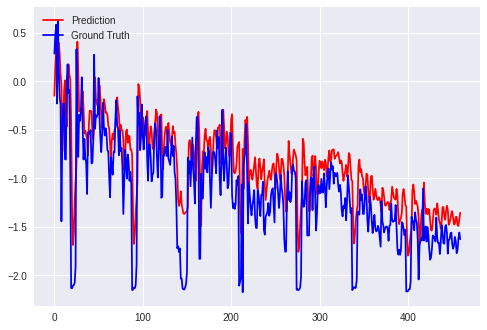

In [ ]:
diff = []
ratio = []
pred = model.predict(X_test)

for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))
import matplotlib
import matplotlib.pyplot as plt2

plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground Truth')
plt2.legend(loc='upper left')
plt2.show()

In [ ]:
#CNN




